# DS Automation Assignment

Using our prepared churn data from week 2:
- use pycaret to find an ML algorithm that performs best on the data
    - Choose a metric you think is best to use for finding the best model; by default, it is accuracy but it could be AUC, precision, recall, etc. The week 3 FTE has some information on these different metrics.
- save the model to disk
- create a Python script/file/module with a function that takes a pandas dataframe as an input and returns the probability of churn for each row in the dataframe
    - your Python file/function should print out the predictions for new data (new_churn_data.csv)
    - the true values for the new data are [1, 0, 0, 1, 0] if you're interested
- test your Python module and function with the new data, new_churn_data.csv
- write a short summary of the process and results at the end of this notebook
- upload this Jupyter Notebook and Python file to a Github repository, and turn in a link to the repository in the week 5 assignment dropbox

*Optional* challenges:
- return the probability of churn for each new prediction, and the percentile where that prediction is in the distribution of probability predictions from the training dataset (e.g. a high probability of churn like 0.78 might be at the 90th percentile)
- use other autoML packages, such as TPOT, H2O, MLBox, etc, and compare performance and features with pycaret
- create a class in your Python module to hold the functions that you created
- accept user input to specify a file using a tool such as Python's `input()` function, the `click` package for command-line arguments, or a GUI
- Use the unmodified churn data (new_unmodified_churn_data.csv) in your Python script. This will require adding the same preprocessing steps from week 2 since this data is like the original unmodified dataset from week 1.

First step is importing Pandas and the data to be analyzed.  This week I learned the importance of importing the data with the customer ID as the index column.

In [5]:
import pandas as pd

df = pd.read_csv('C://Users//cliff//Downloads//prepped_Churn_data.csv', index_col='customerID')
df.head(10)

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,
7590-VHVEG,1,0,1,1,29.85,29.85,0
5575-GNVDE,34,1,12,2,56.95,1889.50,0
3668-QPYBK,2,1,1,2,53.85,108.15,1
7795-CFOCW,45,0,12,3,42.30,1840.75,0
9237-HQITU,2,1,1,1,70.70,151.65,1
9305-CDSKC,8,1,1,1,99.65,820.50,1
1452-KIOVK,22,1,1,4,89.10,1949.40,0
6713-OKOMC,10,0,1,2,29.75,301.90,0
7892-POOKP,28,1,1,1,104.80,3046.05,1


Next set up and choose the correct kernel on which to run Pycaret.  

In [205]:
!jupyter kernelspec list

Available kernels:
  python3    C:\Users\cliff\anaconda3\envs\Py3_10\share\jupyter\kernels\python3
  py3_10     C:\Users\cliff\AppData\Roaming\jupyter\kernels\py3_10


In [6]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7032 non-null   int64  
 1   PhoneService    7032 non-null   int64  
 2   Contract        7032 non-null   int64  
 3   PaymentMethod   7032 non-null   int64  
 4   MonthlyCharges  7032 non-null   float64
 5   TotalCharges    7032 non-null   float64
 6   Churn           7032 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 439.5+ KB


Next step is importing Pycaret.  Full Disclosure:  I could not get it to run on Jupyter Notebooks or Jupyter labs so I had to break down and download Visual Studio and it ran on that which turns out to be pretty great.

In [9]:
from pycaret.classification import ClassificationExperiment #setup, compare_models, predict_model, save_model, load_model

In [10]:
automl = ClassificationExperiment()

In [11]:
automl.setup(df, target='Churn')

,Description,Value
0,Session id,1678
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(7032, 7)"
4,Transformed data shape,"(7032, 7)"
5,Transformed train set shape,"(4922, 7)"
6,Transformed test set shape,"(2110, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


In [12]:
automl

Below the best model for accuracy is found to be the Logistic Regression Model with an accuracy of 79.48%.  Normally I would probably keep going with the best accuracy but since the Logistical Regression method was found to be around 79% in a previous weekly assignment I'll go with the AUC value.  According to the best model comparison function results below the best AUC value was found using the Gradient Boosting Classifier at 84%.

In [13]:
best_model = automl.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)


In [14]:
best_model = automl.compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7976,0.8427,0.5092,0.6542,0.5715,0.4419,0.4486,0.1530
lr,Logistic Regression,0.7989,0.8409,0.5214,0.6526,0.5790,0.4492,0.4545,0.0300
ada,Ada Boost Classifier,0.7995,0.8394,0.5199,0.6552,0.5784,0.4495,0.4554,0.0660
qda,Quadratic Discriminant Analysis,0.7503,0.8297,0.7523,0.5211,0.6153,0.4394,0.4562,0.0110
lda,Linear Discriminant Analysis,0.7944,0.8268,0.5146,0.6421,0.5700,0.4373,0.4427,0.0170
lightgbm,Light Gradient Boosting Machine,0.7861,0.8262,0.5107,0.6188,0.5590,0.4196,0.4233,0.0750
nb,Naive Bayes,0.7202,0.8112,0.7714,0.4846,0.5947,0.3980,0.4236,0.0120
rf,Random Forest Classifier,0.7747,0.7981,0.4801,0.5926,0.5299,0.3841,0.3880,0.1930
et,Extra Trees Classifier,0.7625,0.7830,0.4893,0.5607,0.5219,0.3651,0.3669,0.1190
knn,K Neighbors Classifier,0.7603,0.7552,0.4441,0.5645,0.4960,0.3418,0.3467,0.0240


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [15]:
best_model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=1678, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [16]:

automl.evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

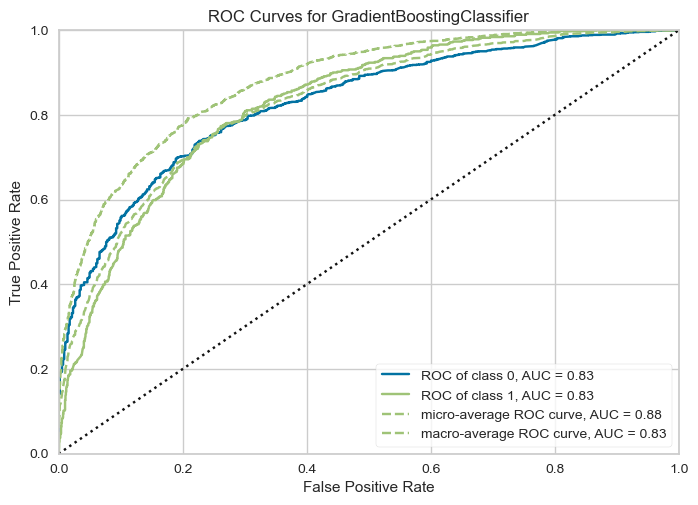

In [17]:
automl.plot_model(best_model)

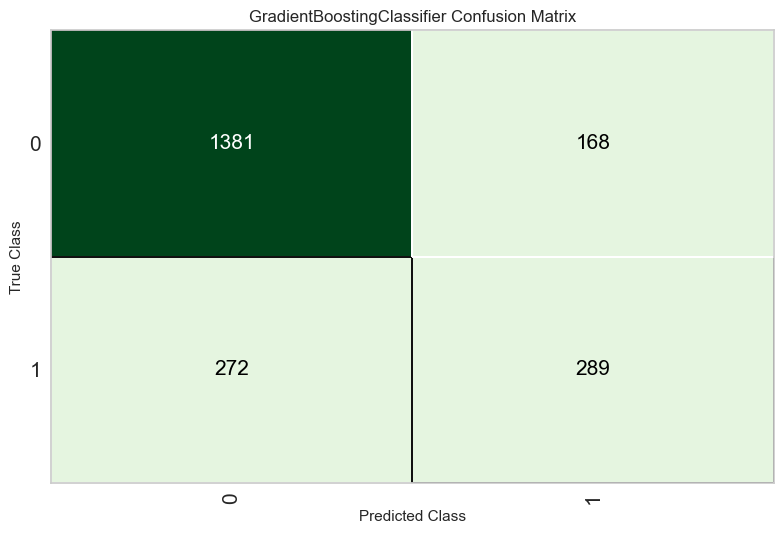

In [18]:
automl.plot_model(best_model, plot = 'confusion_matrix')

the command below shows that the shape of the last two rows of the dataframe are both one row by 7 columns.

In [19]:
df.iloc[-2:-1].shape

(1, 7)

The command below shows the last row of the dataframe has 7 columns.

In [20]:
df.iloc[-1].shape

(7,)

In [21]:
automl.predict_model(best_model, df.iloc[-2:-1])

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prediction_label,prediction_score
customerID,,,,,,,,,
8361-LTMKD,4,1,1,2,74.400002,306.600006,1,1,0.6148


In [22]:
predictions = automl.predict_model(best_model, data=df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8151,0.8628,0.5506,0.6911,0.6129,0.4935,0.4990


In [23]:
predictions.head()

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prediction_label,prediction_score
customerID,,,,,,,,,
7590-VHVEG,1,0,1,1,29.850000,29.850000,0,0,0.6229
5575-GNVDE,34,1,12,2,56.950001,1889.500000,0,0,0.9429
3668-QPYBK,2,1,1,2,53.849998,108.150002,1,0,0.5996
7795-CFOCW,45,0,12,3,42.299999,1840.750000,0,0,0.9320
9237-HQITU,2,1,1,1,70.699997,151.649994,1,1,0.6757


In the cell below, the best model found for AUC(Area under the ROC curve) is being stored in a file called Churn_data_pycaret_model so that it can be used to make future predictions.

In [24]:
automl.save_model(best_model, 'Churn_data_pycaret_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['tenure', 'PhoneService',
                                              'Contract', 'PaymentMethod',
                                              'MonthlyCharges', 'TotalCharges'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('...
                                        

In [25]:
Churn_data_pycaret_model = ClassificationExperiment()
loaded_model = Churn_data_pycaret_model.load_model('Churn_data_pycaret_model')

Transformation Pipeline and Model Successfully Loaded


In [26]:
Churn_data_pycaret_model.predict_model(loaded_model, df.iloc[-2:-1])

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prediction_label,prediction_score
customerID,,,,,,,,,
8361-LTMKD,4,1,1,2,74.400002,306.600006,1,1,0.6148


In [27]:
from IPython.display import Code

Code('Predict_Churn.py')

import pandas as pd
from pycaret.classification import ClassificationExperiment


def load_data(filepath):
    """
    Loads Churn data into a DataFrame from a string filepath.
    """
    #df = pd.read_csv(filepath)
    df = pd.read_csv(filepath, index_col='customerID')

    # Add a column named 'Churn' to the DataFrame
    if 'Churn' not in df.columns:
        df['Churn'] = 0

    return df
    


def make_predictions(df):
    """
    Uses the pycaret best model to make predictions on data in the df dataframe.
    """
    classifier = ClassificationExperiment()
    model = classifier.load_model('Churn_data_pycaret_model')
    predictions = classifier.predict_model(model, data=df)
    predictions.rename({'Label': 'Churn'}, axis=1, inplace=True)
    predictions['Churn'].replace({1: 'Churn', 0: 'No Churn'}, inplace=True)
    return predictions['Churn']


if __name__ == "__main__":
    df = load_data('C://Users//cliff//Downloads//prepped_new_churn_data_unmodified.csv')

    
    predictions = make_predictions(df)
    print('predictions:')
    print(predictions)

Running the New unmodified churn data through the pipeline and model.  Predictions are that all 5 customers will not churn.  I had alot of problems with the Predict_Churn.py expecting a column called 'Churn' or 'Label' however if I added those manually to the CSV file that crashed it as well.  I finally had to add a line to the load_data function that if it did not find a 'Churn' column in the csv file to add one there and that seemed to work.  I also attempted to add a fancy Tkinter GUI since I had been working on those at work all week but I could not get it to work correctly so in the interest of time I scrapped that idea.  

In [29]:
%run Predict_Churn.py

Transformation Pipeline and Model Successfully Loaded
predictions:
customerID
9305-CKSKC    No Churn
1452-KNGVK    No Churn
6723-OKKJM    No Churn
7832-POPKP    No Churn
6348-TACGU    No Churn
Name: Churn, dtype: object


# Summary

Using the previous weeks churn data I was able to run multiple ML models using the PYcaret module.  I was then able to compare the output of those models and found the best accuracy score was from the Logistic Regression model with a similar value to previous findings.  I then chose to use the AUC value as our Churn predictor as the best model for AUC was found to be Gradient Boosting Classifier with a value of 84%.  Next, I plotted the ROC curve and the confusion matrix generated then made some preliminary predictions using the model chosen.  Lastly, I stored the developed model into a module that can be easily accessed by using Python code to make predictions in the future.